In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [7]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.isnull().sum().sum()

np.int64(0)

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [15]:
df["customerID"].duplicated().sum()

np.int64(0)

In [16]:
def conv(value):
  if value == 1:
    return "yes"
  else:
    return "no"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

#### Converted 0 and 1 values senior citizen to yes/no to make it easier to understand.

In [20]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


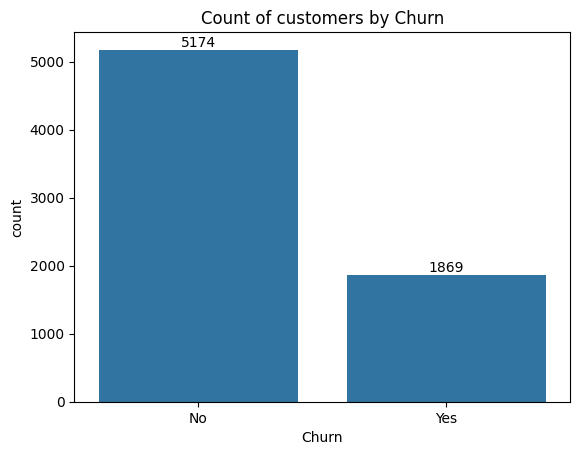

In [22]:
ax = sns.countplot(x = 'Churn', data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of customers by Churn")
plt.show()

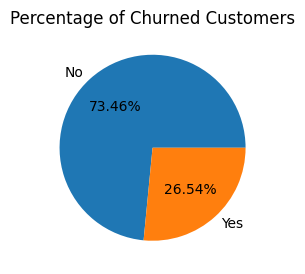

In [24]:
plt.figure(figsize= (3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels= gb.index, autopct= "%1.2f%%")
plt.title("Percentage of Churned Customers")
plt.show()

#### From the given pie chart we can conclude that 26.54% of our customers have churned out
#### now let's explore the reason behind it

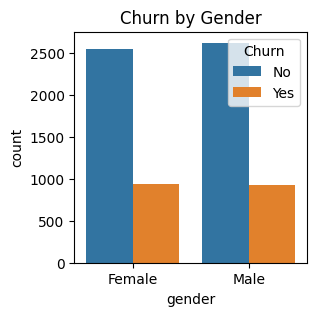

In [28]:
plt.figure(figsize= (3,3))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

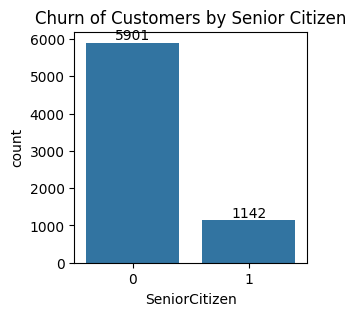

In [8]:
plt.figure(figsize= (3,3))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Churn of Customers by Senior Citizen")
plt.show()

<Figure size 400x400 with 0 Axes>

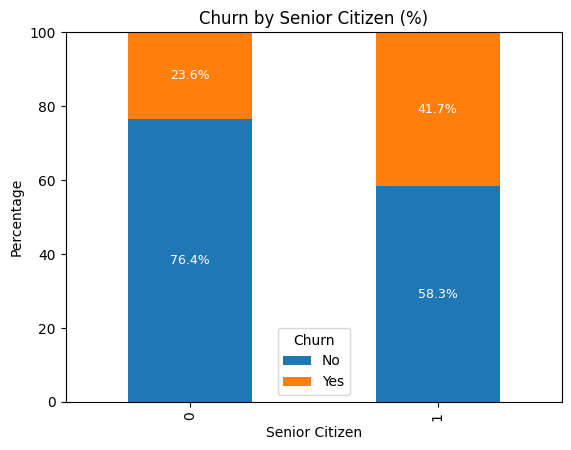

In [15]:
# Group and calculate percentages
counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
plt.figure(figsize=(4, 4))
percentages.plot(kind='bar', stacked=True)

# Add percentage labels
for i in range(len(percentages)):
    cumulative = 0
    for value in percentages.iloc[i]:
        plt.text(
            i,
            cumulative + value / 2,
            f"{value:.1f}%",
            ha='center',
            va='center',
            color='white',
            fontsize=9
        )
        cumulative += value

# Labels and title
plt.title("Churn by Senior Citizen (%)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.ylim(0, 100)
plt.legend(title="Churn")

plt.show()


#### comparatively a greater percentage of people in senior citizen category have chuned

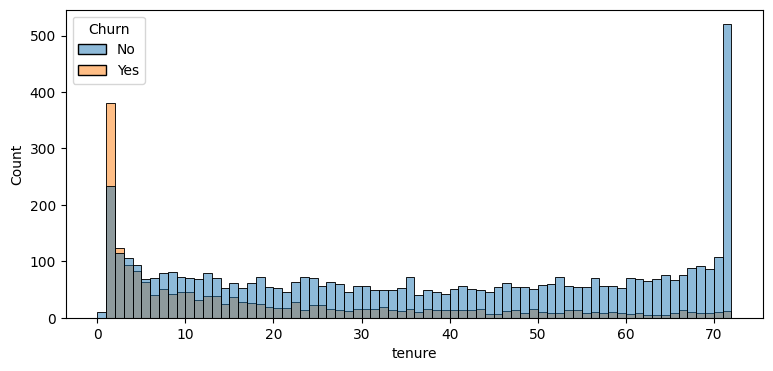

In [14]:
plt.figure(figsize= (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue="Churn")
plt.show()

#### people who have used our services for a long time have stayed and people who have used our services 1 or 2 months have churned

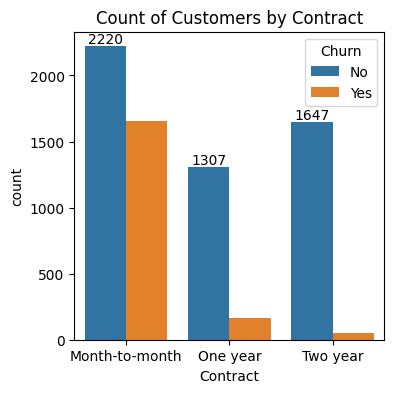

In [16]:
plt.figure(figsize= (4,4))
ax = sns.countplot(x = 'Contract', data = df, hue= 'Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

#### people who have month to month contract are likely to churn then from those who have 1 or 2 years of contract

In [17]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

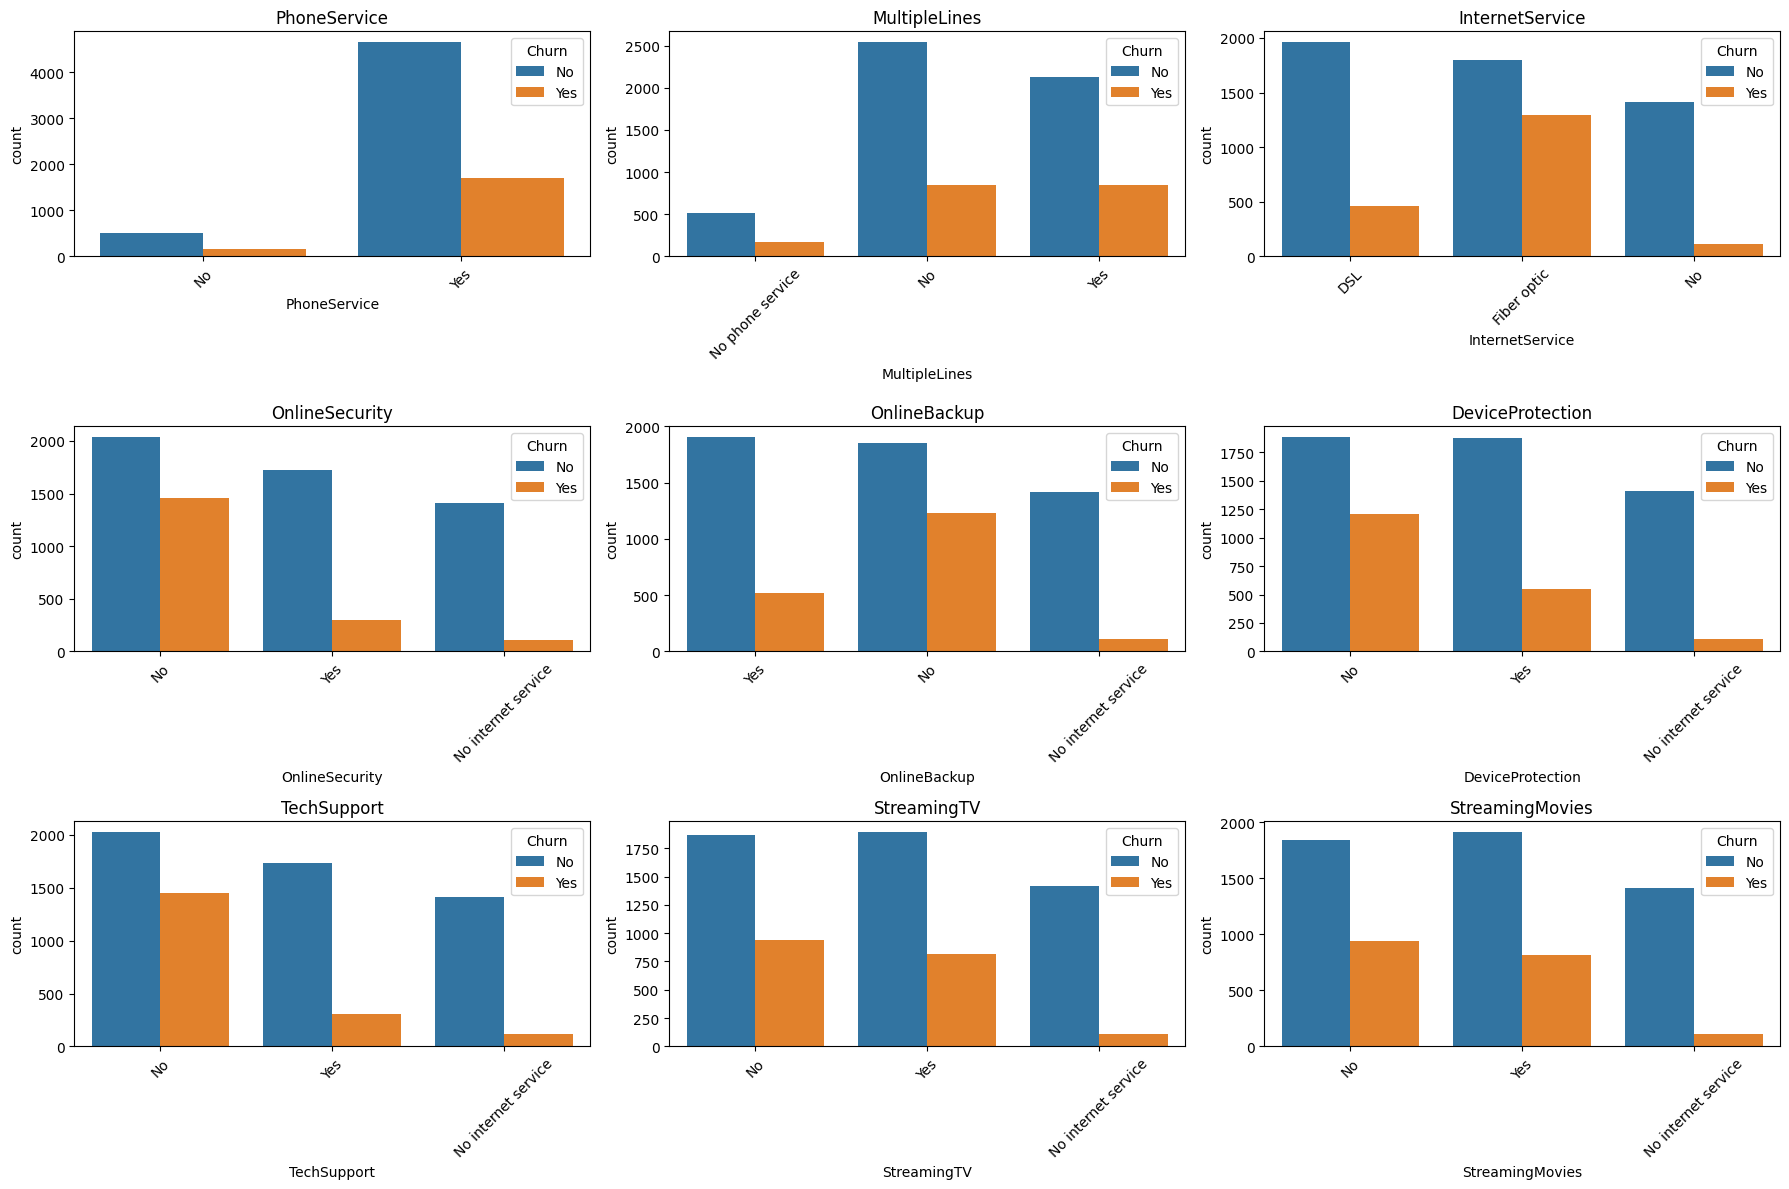

In [20]:
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

plt.figure(figsize=(18, 12))

for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, hue= df["-Churn"] )
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


####* Customers **without add-on services** like OnlineSecurity, TechSupport, and DeviceProtection show **significantly higher churn**, indicating these services help in customer retention.
####* **Fiber optic internet users** have a noticeably **higher churn rate** compared to DSL users, suggesting pricing or service expectations may be an issue.
####* Customers with **No Internet Service** consistently show **very low churn**, making them a more stable segment.
####* Streaming services (TV & Movies) alone do not strongly reduce churn, unlike **security and support-related services**, which have a clearer impact.

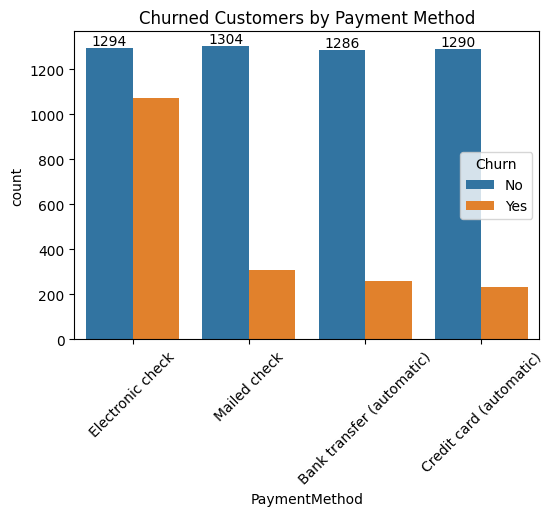

In [23]:
plt.figure(figsize= (6,4))
ax = sns.countplot(x = 'PaymentMethod', data = df, hue= 'Churn')
ax.bar_label(ax.containers[0])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()